 # LSTM Recurrent Neural Networks with Keras

In this tutorial we try to predict the amount of passenger in international airline
the dataset is in [this link](https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line)

In [1]:
import pandas
import matplotlib.pyplot as plt
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataframe)
plt.show()

## LSTM Network for Regression

We can phrase the problem as a regression problem.

That is, given the number of passengers (in units of thousands) this month, what is the number of passengers next month?

We can write a simple function to convert our single column of data into a two-column dataset: the first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count, to be predicted.

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
type(dataframe)
print(dataframe[0:3])

   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0                                                112                             
1                                                118                             
2                                                132                             


here our data is a pandas's DataFrame.
we will change in to be a numpy array with datatype float which is better to be use with neural network.

In [5]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset.shape)

(144, 1)


LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing.

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset.shape)

(144, 1)


In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [8]:
# convert an array of values into a dataset matrix
def create_dataset_matrix(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [12]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset_matrix(train, look_back)
testX, testY = create_dataset_matrix(test, look_back)
# print(trainX.shape,trainY.shape)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:

In [13]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
print(trainX.shape)

(93, 1, 2)


## creating our LSTM model

In [15]:
model = Sequential()
# 1st hidden layer with 4 lstm and sigmoid as an activation function
model.add(LSTM(4,input_shape=(1, look_back)))
# connect it to output layer with a sigle value of an output
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.0227
Epoch 2/100
0s - loss: 0.0095
Epoch 3/100
0s - loss: 0.0075
Epoch 4/100
0s - loss: 0.0066
Epoch 5/100
0s - loss: 0.0058
Epoch 6/100
0s - loss: 0.0051
Epoch 7/100
0s - loss: 0.0046
Epoch 8/100
0s - loss: 0.0041
Epoch 9/100
0s - loss: 0.0037
Epoch 10/100
0s - loss: 0.0033
Epoch 11/100
0s - loss: 0.0032
Epoch 12/100
0s - loss: 0.0030
Epoch 13/100
0s - loss: 0.0029
Epoch 14/100
0s - loss: 0.0030
Epoch 15/100
0s - loss: 0.0028
Epoch 16/100
0s - loss: 0.0028
Epoch 17/100
0s - loss: 0.0028
Epoch 18/100
0s - loss: 0.0028
Epoch 19/100
0s - loss: 0.0028
Epoch 20/100
0s - loss: 0.0028
Epoch 21/100
0s - loss: 0.0027
Epoch 22/100
0s - loss: 0.0027
Epoch 23/100
0s - loss: 0.0027
Epoch 24/100
0s - loss: 0.0026
Epoch 25/100
0s - loss: 0.0027
Epoch 26/100
0s - loss: 0.0026
Epoch 27/100
0s - loss: 0.0026
Epoch 28/100
0s - loss: 0.0027
Epoch 29/100
0s - loss: 0.0027
Epoch 30/100
0s - loss: 0.0026
Epoch 31/100
0s - loss: 0.0026
Epoch 32/100
0s - loss: 0.0026
Epoch 33/100
0s -

## Model Evaluation

We finnish training our model. Congratulation!!!
Now we will test the model out with the data we have split earlier.

remember that we normalize our data to have the range of -1 to 1.
now we would like to invert it back to have the same unit with our data set.
So, that it can be compare together and our output is making more sense.

in anoter word we convert it back into passeger per month.(0.1 passeger kinda weird right?)

In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inv = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inv = scaler.inverse_transform([testY])

In [17]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inv[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_inv[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.49 RMSE
Test Score: 50.32 RMSE


Finally, we can generate predictions using the model for both the train and test dataset to get a visual indication of the skill of the model.

Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. Once prepared, the data is plotted, showing the original dataset in blue, the predictions for the training dataset in green, and the predictions on the unseen test dataset in red.

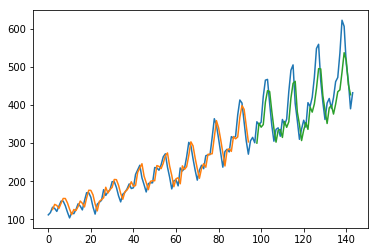

In [18]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()